## Plotting routines
a selection of plotting routines for easy access

In [1]:
import file_processor as fp  #contains simple routines for sorting files and making directories
import processing_tools as pt #bulk of the processing
import int_plot as ip #allows for interactive plots


#### Plotting entire directories
As it is necessary to often plot many files, a script is included that will go through a directory, make a folder for each file (which ends in .h5, but you may specify other endings by the optional parameter 'file_ending' )
This plots all the defaults, both in pandas and bokeh and then moves them in said directory.

In [2]:
directory = './example'
fp.plot_defaults(directory, num_slices = 50, file_ending='.h5')


./example\*.h5


#### Interactive plots
To plot an interactive interface an ordered list of files which follows the path along the simulation must be provided.
file_processor has some tools to ease this process. This can plot either any combination of standard distributions or the slice values over a slice.

In [3]:
list_of_files = fp.directory_list('./example') #returns a list of files that 
#can be sorted in your preferred method
fp.sort_nicely(list_of_files) # sorts in a nice way, but you ought to check
#in this case the files are too different to work, so I provide similar files 

list_of_files = ['./example/noise_10kSI_MASP.h5',
             './example/noise_10kSI_MASP.h5',
             './example/noise_10kSI_MASP.h5']

from bokeh.plotting import show
from bokeh.io import output_notebook  #To view on a notebook such as this
output_notebook()  # allows Bokeh to output to the notebook

int_plot = ip.interactive_plot(list_of_files,'z_pos','CoM_y',num_slices=100, undulator_period=0.0275,k_fact=1) 
#what to plot
show(int_plot)

Loading BokehJS ...

processing_tools.py:170: RuntimeWarning: invalid value encountered in sqrt
  self.dict['e_y'][i] = np.sqrt((y_2*py_2)-(ypy*ypy))
processing_tools.py:169: RuntimeWarning: invalid value encountered in sqrt
  self.dict['e_x'][i] = np.sqrt((x_2*px_2)-(xpx*xpx))                        #
processing_tools.py:30: RuntimeWarning: divide by zero encountered in divide
  calc = np.divide(calc, emittance)
processing_tools.py:30: RuntimeWarning: invalid value encountered in divide
  calc = np.divide(calc, emittance)
processing_tools.py:289: RuntimeWarning: divide by zero encountered in double_scalars
  (2*np.pi*self.dict['std_x'][slice_no]*self.dict['std_y'][slice_no])
FEL_equations.py:102: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([gain_length*wavelength/(4*const.pi*transverse_size**2)])
FEL_equations.py:93: RuntimeWarning: invalid value encountered in power
  sp[12]*np.power(nd, sp[13])*np.power(ne, sp[14])+
FEL_equations.py:94: RuntimeWarning: invalid value enc

#### Quick plotting
To quickly plot any combination the pandas inbuit system can help

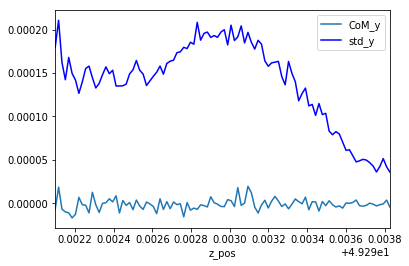

In [4]:
import matplotlib.pyplot as plt

test = pt.ProcessedData('./example/example.h5',undulator_period=0.00275,num_slices=100)
panda_data = test.StatsFrame()
ax = panda_data.plot(x='z_pos',y='CoM_y')
panda_data.plot(ax=ax, x='z_pos',y='std_y',c='b') #first option allows shared axes, one can even mix different runs
#by plotting another dataset on the same axis
plt.show()
